connect to the drive to access to the data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!unzip /content/drive/MyDrive/projects/teeside-repo/28050083.zip -d /content/

Archive:  /content/drive/MyDrive/projects/teeside-repo/28050083.zip
 extracting: /content/TCGA-BRCA-A2-DEEPMED-TILES.zip  
 extracting: /content/TCGA-BRCA-A2-CLINI.xlsx  
 extracting: /content/TCGA-BRCA-A2_SLIDE.xlsx  
 extracting: /content/TCGA-BRCA-RNA-Seq.csv  
 extracting: /content/TCGA-BRCA-A2-target_variable.xlsx  


unzip images

In [3]:
!unzip /content/TCGA-BRCA-A2-DEEPMED-TILES.zip -d /content/

Streaming output truncated to the last 5000 lines.
  inflating: /content/BLOCKS_NORM_MACENKO/TCGA-A2-A4S2-01Z-00-DX1.D779B63B-8817-43F1-A8F4-236C82DB78F8/TCGA-A2-A4S2-01Z-00-DX1.D779B63B-8817-43F1-A8F4-236C82DB78F8_(43596,43596).jpg  
  inflating: /content/BLOCKS_NORM_MACENKO/TCGA-A2-A4S2-01Z-00-DX1.D779B63B-8817-43F1-A8F4-236C82DB78F8/TCGA-A2-A4S2-01Z-00-DX1.D779B63B-8817-43F1-A8F4-236C82DB78F8_(43596,44634).jpg  
  inflating: /content/BLOCKS_NORM_MACENKO/TCGA-A2-A4S2-01Z-00-DX1.D779B63B-8817-43F1-A8F4-236C82DB78F8/TCGA-A2-A4S2-01Z-00-DX1.D779B63B-8817-43F1-A8F4-236C82DB78F8_(43596,45672).jpg  
  inflating: /content/BLOCKS_NORM_MACENKO/TCGA-A2-A4S2-01Z-00-DX1.D779B63B-8817-43F1-A8F4-236C82DB78F8/TCGA-A2-A4S2-01Z-00-DX1.D779B63B-8817-43F1-A8F4-236C82DB78F8_(43596,46710).jpg  
  inflating: /content/BLOCKS_NORM_MACENKO/TCGA-A2-A4S2-01Z-00-DX1.D779B63B-8817-43F1-A8F4-236C82DB78F8/TCGA-A2-A4S2-01Z-00-DX1.D779B63B-8817-43F1-A8F4-236C82DB78F8_(43596,47748).jpg  
  inflating: /content/BLOCKS_

In [7]:
!pip install tensorflow==2.13.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 479.7/479.7 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.8/440.8 kB 8.8 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.12.2
    Uninstalling typing_extensions-4.12.2:
      Successfully uninstalled typing_extensions-4.12.2
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
  Attempting uninstall: keras
    Found existing installation: keras 3.5.0
    Uninstalling keras-3.5.0:
      Successfully uninstalled keras-3.5.0
  Attempting uninstall: gast
    Found existing installation: gast 0.6.0
    Uninstalling gast-0.6.0:
      Suc

imprting required libraries

In [2]:
import random
import tensorflow as tf
import torchvision.transforms as transforms
import seaborn as sns
from PIL import Image
import numpy as np
import os
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization, MultiHeadAttention, LayerNormalization, Add
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
import pandas as pd
from keras.src.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, KFold
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, Flatten, Concatenate, Dropout, BatchNormalization, Layer
from tensorflow.python.keras.callbacks import LearningRateScheduler, Callback, ModelCheckpoint, EarlyStopping
from tensorflow.python.keras.layers.convolutional import Conv1D
from tensorflow.python.keras.layers.embeddings import Embedding
from tensorflow.python.keras.layers.pooling import GlobalAveragePooling2D, GlobalAveragePooling1D
from sklearn.metrics import confusion_matrix, matthews_corrcoef, f1_score, \
    precision_recall_curve, auc
import matplotlib.pyplot as plt
import matplotlib
from tensorflow.python.keras.regularizers import l2
random.seed(39)

In [3]:
print(tf.__version__)

2.13.1


correcting target class from tab deliminate  to cell deliminate

In [4]:
import csv

# Input and output file paths
input_file = '/content/TCGA-BRCA-RNA-Seq.csv'  # Replace with the path to your input CSV file
output_file = '/content/output.csv'  # Replace with the desired path for the output CSV file

# Open the input file
with open(input_file, 'r', newline='', encoding='utf-8') as infile:
    reader = csv.reader(infile)

    # Open the output file
    with open(output_file, 'w', newline='', encoding='utf-8') as outfile:
        writer = csv.writer(outfile)

        # Process each row in the input file
        for row in reader:
            # Create a new row by splitting each cell by tab and flattening
            new_row = []
            for cell in row:
                new_row.extend(cell.split('\t'))

            # Write the new row to the output file
            writer.writerow(new_row)

drop 0 samples from gen expression samples

In [5]:
# Input and output file paths
output_file = '/content/output.csv'  # Replace with the desired path for the output CSV file
filtered_output_file = '/content/gene_expression.csv'  # Path for the filtered output file

# Filter rows to drop rows with all zero values except the first column
# Filter rows to drop rows where any cell is zero
with open(output_file, 'r', newline='', encoding='utf-8') as outfile:
    reader = csv.reader(outfile)

    with open(filtered_output_file, 'w', newline='', encoding='utf-8') as filtered_outfile:
        writer = csv.writer(filtered_outfile)
        idx=0
        for row in reader:
            idx+=1
            # if idx == 146:
                # print(idx)
            # Check if no cell in the row is zero
            if all(cell != '0.0' for cell in row):
                writer.writerow(row)

print(f"Transformation complete. Output saved to '{output_file}'.")
print(f"Filtered output saved to '{filtered_output_file}'.")

Transformation complete. Output saved to '/content/output.csv'.
Filtered output saved to '/content/gene_expression.csv'.


adding the input files and path

In [6]:
GEX_FILE = "/content/gene_expression.csv"
METADATA_FILE = "/content/TCGA-BRCA-A2-target_variable.xlsx"
IMAGE_DIR = "/content/BLOCKS_NORM_MACENKO"

drop normal classes and group subclassees into 2 class of BRCA.lum[A/B] = 0 and BRCA[Basal/her]=1

In [15]:
def preprocess_metadata(file_path):
    metadata = pd.read_excel(file_path)

    # Modify class labels as described
    metadata = metadata[metadata['TCGA Subtype'] != 'BRCA.Normal']
    metadata['TCGA Subtype'] = metadata['TCGA Subtype'].replace({
        'BRCA.LumA': 0, 'BRCA.LumB': 0,
        'BRCA.Basal': 1, 'BRCA.Her2': 1
    })

    return metadata
# Preprocess Metadata
metadata = preprocess_metadata(METADATA_FILE)

<ipython-input-15-e966540b64ea>:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  metadata['TCGA Subtype'] = metadata['TCGA Subtype'].replace({


In [ ]:
print(metadata.head(5))

        PATIENT        Sample ID  TCGA Subtype Class
0  TCGA-A2-A04N  TCGA-A2-A04N-01             0     1
1  TCGA-A2-A04P  TCGA-A2-A04P-01             1     0
2  TCGA-A2-A04Q  TCGA-A2-A04Q-01             1     0
3  TCGA-A2-A04R  TCGA-A2-A04R-01             0     1
4  TCGA-A2-A04T  TCGA-A2-A04T-01             1     0


filter 100 patches per image and normalize with color_jitter then update the subjects and filter the existance subjects based on their image patche existance.

In [16]:
def preprocess_images(image_dir,  metadata):
    """
    Preprocess images from a directory based on patient IDs and apply stain augmentation.

    Parameters:
        image_dir (str): Directory containing patient image folders.
        patient_ids (iterable): List or Series of valid patient IDs.

    Returns:
        dict: A dictionary containing preprocessed image patches keyed by patient ID.
    """
    patch_data = {}
    valid_sample_ids = []

    # Define the ColorJitter transform for stain augmentation
    color_jitter = transforms.ColorJitter(
        brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1
    )

    for patient_id in metadata['Sample ID'].values:
        sample_id=[item for item in os.listdir(image_dir) if patient_id in item]

        if sample_id:


            patient_path = os.path.join(image_dir, sample_id[0])
            if not os.path.exists(patient_path):
                continue


            # Randomly select up to 100 images from the patient folder
            img_files = os.listdir(patient_path)

            random.shuffle(img_files)
            # selected_files= cluster_and_select_patches(img_files, patient_path, n_clusters=10, n_patches=200)
            selected_files = img_files[:50]

            patches = []
            for img_file in selected_files:
                img_path = os.path.join(patient_path, img_file)
                try:
                    # Open the image with PIL
                    with Image.open(img_path) as img:
                        # Resize the image to 224x224 (high-resolution patches)
                        patch = img

                        # Perform OTSU segmentation
                        # gray_thumbnail = np.array(patch.convert('L'))  # Convert to grayscale
                        # otsu_thresh = threshold_otsu(gray_thumbnail)

                        # Check if the region of interest satisfies the threshold
                        # if np.mean(gray_thumbnail > otsu_thresh) > 0.5:
                            # Convert the image to an array and normalize
                            # Apply random color jitter for stain augmentation

                        patch_tensor = transforms.ToTensor()(patch)  # Convert to Tensor
                        patch_tensor = color_jitter(patch_tensor)  # Apply ColorJitter
                        patch_array = patch_tensor.numpy().transpose(1, 2, 0)  # Convert back to array

                        # Normalize pixel values to [0, 1]
                        patch_array = np.clip(patch_array, 0, 1)
                        patches.append(patch_array)



                except Exception as e:
                    print(f"Error processing image {img_path}: {e}")
                    continue

            if patches:
                patch_data[patient_id] = np.array(patches)
                valid_sample_ids.append(patient_id)
        else:
            print(f'No patient ID {patient_id}')

    # Update metadata with valid sample IDs
    updated_metadata = metadata[metadata['Sample ID'].isin(valid_sample_ids)].copy()
    sorted_patch_data = {sample_id: patch_data[sample_id] for sample_id in updated_metadata['Sample ID'] if sample_id in patch_data}

    return sorted_patch_data, updated_metadata
# Preprocess Images
image_data, metadata = preprocess_images(IMAGE_DIR, metadata)

No patient ID TCGA-A2-A0D1-01
No patient ID TCGA-A2-A0D2-01


filter gen expression samples based on the existance of the subjects

In [17]:
def filter_data(gex_file_path, metadata):
    # metadata = metadata[:10]
    sample_ids = metadata['Sample ID']
    gex_data = pd.read_csv(gex_file_path, index_col=0)
    # Transpose to have patients as rows and genes as columns
    gex_data = gex_data.transpose()

    # Filter gex_data to retain only rows with indices in Sample_ID
    filtered_gex = gex_data[gex_data.index.isin(sample_ids.values)]
    filtered_gex = filtered_gex.loc[sample_ids]
    labels=metadata['TCGA Subtype']

    return filtered_gex, metadata, labels
# Filter Data
gex_data, metadata, labels = filter_data(GEX_FILE, metadata)

Gen expression data normalization:


*   shifting data for negative samples by +1
*   log transform
*   z-transform





In [18]:
def preprocess_gene_expression(gex_data, nan_strategy='mean', normalization='zscore'):
    # Step 1: Handle negative values
    if (gex_data < 0).any().any():
        gex_data += abs(gex_data.min().min()) + 1  # Shift by absolute minimum + 1

    # Step 2: Log-transform (optional, after shifting negative values)
    gex_data = np.log1p(gex_data)

    # Step 3: Normalize data
    if normalization == 'zscore':
        scaler = StandardScaler()
        gex_data_scaled = pd.DataFrame(
            scaler.fit_transform(gex_data),
            index=gex_data.index,
            columns=gex_data.columns
        )
    elif normalization == 'minmax':
        scaler = MinMaxScaler()
        gex_data_scaled = pd.DataFrame(
            scaler.fit_transform(gex_data),
            index=gex_data.index,
            columns=gex_data.columns
        )
    else:
        gex_data_scaled = gex_data  # No normalization

    # Step 4: Handle NaN values
    if nan_strategy == 'mean':
        gex_data_scaled = gex_data_scaled.fillna(gex_data_scaled.mean())
    elif nan_strategy == 'median':
        gex_data_scaled = gex_data_scaled.fillna(gex_data_scaled.median())
    elif nan_strategy == 'drop':
        gex_data_scaled = gex_data_scaled.dropna(axis=1)

    return gex_data_scaled

gex_data_scaled = preprocess_gene_expression(gex_data)

Plot the gen expression normalized data samples (skip it if the aim is training because of the colab memory leackage)

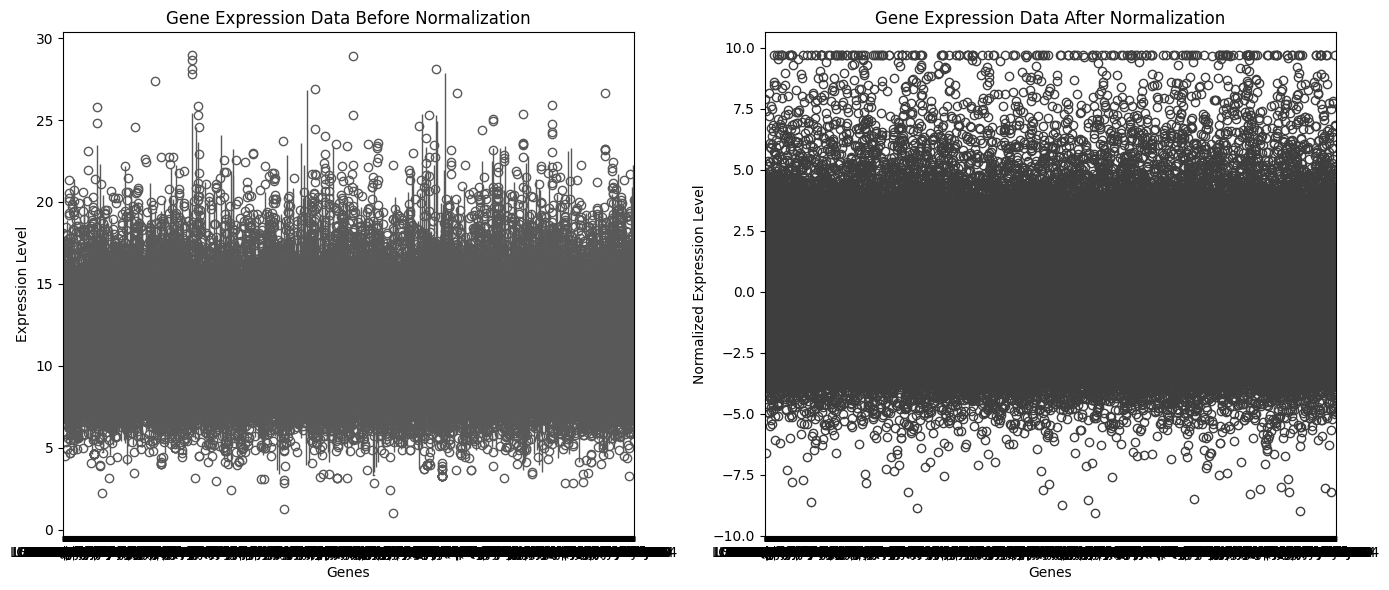

In [ ]:
def plot_gene_expression_before_after(gex_data, gex_data_scaled):
        """
        Function to plot gene expression data before and after normalization.

        Args:
        - gex_data (pd.DataFrame): Original gene expression data.
        - gex_data_scaled (pd.DataFrame): Normalized gene expression data.
        """
        # Set up the plot
        fig, axes = plt.subplots(1, 2, figsize=(14, 6))

        # Plot before normalization
        axes[0].set_title('Gene Expression Data Before Normalization')
        sns.boxplot(data=gex_data, ax=axes[0], palette="Set2")
        axes[0].set_xlabel("Genes")
        axes[0].set_ylabel("Expression Level")

        # Plot after normalization
        axes[1].set_title('Gene Expression Data After Normalization')
        sns.boxplot(data=gex_data_scaled, ax=axes[1], palette="Set1")
        axes[1].set_xlabel("Genes")
        axes[1].set_ylabel("Normalized Expression Level")

        plt.tight_layout()
        plt.show()


# Assuming gex_data is your original gene expression data and gex_data_scaled is the processed one
plot_gene_expression_before_after(gex_data, gex_data_scaled)

model creation with attention

In [ ]:
def build_multi_modal_attention_model():
    # Define two inputs
    visual_input = Input(shape=(200, 2048,), name="visual_features")
    gene_input = Input(shape=(20318,), name="gene_features")

    # Transform gene input
    gene_transformed = Dense(512, activation='relu', name="gene_dense")(gene_input)
    gene_transformed = tf.expand_dims(gene_transformed, axis=1)  # Make it 3D for attention

    # Vision features
    x1 = Conv1D(512, kernel_size=3, activation='relu', name="conv1d_visual_features")(visual_input)

    # Add vision-language attention
    attention = MultiHeadAttention(num_heads=8, key_dim=512, name="vision_language_attention")
    attn_output = attention(query=x1, value=gene_transformed, key=gene_transformed)

    # Ensure 2D output for dense layers
    attn_output = Flatten(name="flatten_attention")(attn_output)

    # Fully connected layers
    ff_dense1 = Dense(512, activation='relu', kernel_regularizer=l2(1e-4), name="dense_512")(attn_output)
    ff_dense1 = Dropout(0.5, name="dropout_512")(ff_dense1)
    ff_dense1 = BatchNormalization(name="batch_norm_512")(ff_dense1)

    ff_dense2 = Dense(256, activation='relu', kernel_regularizer=l2(1e-4), name="dense_256")(ff_dense1)
    ff_dense2 = Dropout(0.5, name="dropout_256")(ff_dense2)

    # Output layer
    output = Dense(1, activation='sigmoid', name="output")(ff_dense2)

    # Define and compile the model
    model = Model(inputs=[visual_input, gene_input], outputs=output, name="multi_modal_attention_model")
    model.compile(optimizer=Adam(learning_rate=1e-5), loss='binary_crossentropy', metrics=['accuracy'])

    return model

data conversion

In [19]:
gex_data=gex_data_scaled.to_numpy()
image_data = np.array(list(image_data.values()))
combined_data = list(zip(image_data, gex_data))
labels= labels.to_numpy()

model training

In [ ]:
def lr_scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * tf.math.exp(-0.1)
def visu_model(image_data):
    patient_data = []

    # Initialize the ResNet50 model with weights and exclude the top layer
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(256, 256, 3))
    x = GlobalAveragePooling2D()(base_model.output)
    feature_extractor = Model(inputs=base_model.input, outputs=x)

    # Iterate through the list of image patches
    for image_patches in image_data:
        # Print the range of the shape to verify the image patch count

        # Extract features from the image patches using the pre-trained ResNet50 model
        patch_features = np.array(feature_extractor.predict(image_patches))

        # Pool the extracted features (mean pooling)
        # patch_features = np.mean(patch_features, axis=0)  # Example: average pooling

        # Append the pooled image features to the patient_data list
        patient_data.append(patch_features)

    # Return the combined patient data as a NumPy array
    return np.array(patient_data)

def build_multi_input_model():
    # Define two inputs
    input1 = Input(shape=(50, 2048), name="visual-features")  # Updated shape
    input2 = Input(shape=(20318,), name="gene_transformed")

    # Process vision features
    x1 = Conv1D(512, kernel_size=3, activation='relu', name="conv1d_visual_features")(input1)
    x1 = GlobalAveragePooling1D(name="gap_visual_features")(x1)  # Flatten spatial dimension

    # Transform gene input
    gene_transformed = Dense(512, activation='relu', name="dense_gene_transformed")(input2)

    # Concatenate the two processed inputs
    x = Concatenate(name="concat")([x1, gene_transformed])


    x = Dense(512, activation='relu', kernel_regularizer=l2(1e-4), name="dense_512")(gene_transformed)
    x = Dropout(0.5, name="dropout_512")(x)
    x = BatchNormalization(name="batch_norm_512")(x)
    x = Dense(256, activation='relu', kernel_regularizer=l2(1e-4), name="dense_256")(x)
    x = Dropout(0.5, name="dropout_256")(x)
    output = Dense(1, activation='sigmoid', name="output")(x)

    # Define the model
    model = Model(inputs=[input1, input2], outputs=output, name="lti_model")
    model.compile(optimizer=Adam(learning_rate=1e-5), loss='binary_crossentropy', metrics=['accuracy'])
    return model



# Initialize 5-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Placeholders for aggregated metrics
all_f1_scores = []
all_mcc_scores = []
all_pr_aucs = []

all_train_loss = []
all_val_loss = []
all_train_accuracy = []
all_val_accuracy = []
all_histories = []

fold = 1
for train_index, val_index in kf.split(combined_data):
    print(f"\nStarting Fold {fold}...\n")

    # Split data for this fold
    X_train, X_val = [combined_data[i] for i in train_index], [combined_data[i] for i in val_index]
    y_train, y_val = labels[train_index], labels[val_index]

    x1_train = [item[0] for item in X_train]
    x2_train = [item[1] for item in X_train]
    x1_val = [item[0] for item in X_val]
    x2_val = [item[1] for item in X_val]

    # Data augmentation (if any)
    # x1_train, x2_train, y_train = augmentation(x1_train, x2_train, y_train)

    # Process multimodal inputs
    x1_train = visu_model(x1_train)
    x1_val = visu_model(x1_val)

    x1_train = np.array(x1_train)
    x2_train = np.array(x2_train)
    x1_val = np.array(x1_val)
    x2_val = np.array(x2_val)

    # Build and compile the model

    # x2_train = np.zeros((x2_train.shape[0], 20318))  # Replace gene input with zeros
    # x1_train = np.zeros((x1_train.shape[0], 200, 2048))  # Replace visual input with zeros


    fusion_model = build_multi_input_model()
    # fusion_model = build_multi_modal_attention_model()
    fusion_model.summary()

    # Define callbacks
    lr_callback = LearningRateScheduler(lr_scheduler)
    # checkpoint_path = f"checkpoint/fold_{fold}_best_model_checkpoint.h5"
    # checkpoint_callback = ModelCheckpoint(
    #     filepath=checkpoint_path,
    #     monitor='val_accuracy',
    #     save_best_only=True,
    #     mode='max',
    #     verbose=1
    # )

    early_stopping = EarlyStopping(
        monitor='val_loss',
        patience=5,
        restore_best_weights=True,
        verbose=1
    )

    # Train the model
    history = fusion_model.fit(
        [x1_train, x2_train],
        y_train,
        validation_data=([x1_val, x2_val], y_val),
        epochs=50,
        batch_size=8,
        callbacks=[lr_callback, early_stopping],
    )

    # Evaluate on validation set
    y_val_pred_probs = fusion_model.predict([x1_val, x2_val])
    y_val_pred = (y_val_pred_probs >= 0.5).astype(int)

    cm = confusion_matrix(y_val, y_val_pred)
    f1 = f1_score(y_val, y_val_pred)
    mcc = matthews_corrcoef(y_val, y_val_pred)
    precision, recall, _ = precision_recall_curve(y_val, y_val_pred_probs)
    pr_auc = auc(recall, precision)

    all_f1_scores.append(f1)
    all_mcc_scores.append(mcc)
    all_pr_aucs.append(pr_auc)

    # Log metrics for this fold
    print(f"Fold {fold} Metrics:")
    print(f"F1-Score: {f1:.4f}")
    print(f"MCC: {mcc:.4f}")
    print(f"PR-AUC: {pr_auc:.4f}")
    print(f'confusion matrix: {cm}')

    # Plot confusion matrix
    # plt.figure(figsize=(8, 6))
    # sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"],
    #             yticklabels=["Class 0", "Class 1"])
    # plt.xlabel("Predicted")
    # plt.ylabel("Actual")
    # plt.title(f"Confusion Matrix for Fold {fold}")
    # plt.show()

    fold += 1

    # Store the history object for this fold
    all_histories.append(history)

    # Collect training metrics
    all_train_loss.append(history.history['loss'])
    all_val_loss.append(history.history['val_loss'])
    all_train_accuracy.append(history.history['accuracy'])
    all_val_accuracy.append(history.history['val_accuracy'])

# Aggregate and report average metrics
print("\nFinal Cross-Validation Metrics:")
print(f"Average F1-Score: {np.mean(all_f1_scores):.4f} ± {np.std(all_f1_scores):.4f}")
print(f"Average MCC: {np.mean(all_mcc_scores):.4f} ± {np.std(all_mcc_scores):.4f}")
print(f"Average PR-AUC: {np.mean(all_pr_aucs):.4f} ± {np.std(all_pr_aucs):.4f}")

# Determine the minimum number of epochs across all folds
min_epochs = min(len(hist.history['loss']) for hist in all_histories)

# Truncate the lists to the minimum number of epochs
all_train_loss = [loss[:min_epochs] for loss in all_train_loss]
all_val_loss = [loss[:min_epochs] for loss in all_val_loss]
all_train_accuracy = [acc[:min_epochs] for acc in all_train_accuracy]
all_val_accuracy = [acc[:min_epochs] for acc in all_val_accuracy]

# Calculate average and standard deviation
avg_train_loss = np.mean(all_train_loss, axis=0)
std_train_loss = np.std(all_train_loss, axis=0)
avg_val_loss = np.mean(all_val_loss, axis=0)
std_val_loss = np.std(all_val_loss, axis=0)

avg_train_accuracy = np.mean(all_train_accuracy, axis=0)
std_train_accuracy = np.std(all_train_accuracy, axis=0)
avg_val_accuracy = np.mean(all_val_accuracy, axis=0)
std_val_accuracy = np.std(all_val_accuracy, axis=0)

epochs = range(1, len(avg_train_loss) + 1)

# Plot Loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, avg_train_loss, label='Training Loss', color='blue')
plt.fill_between(epochs, avg_train_loss - std_train_loss, avg_train_loss + std_train_loss, color='blue', alpha=0.2)
plt.plot(epochs, avg_val_loss, label='Validation Loss', color='orange')
plt.fill_between(epochs, avg_val_loss - std_val_loss, avg_val_loss + std_val_loss, color='orange', alpha=0.2)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, avg_train_accuracy, label='Training Accuracy', color='blue')
plt.fill_between(epochs, avg_train_accuracy - std_train_accuracy, avg_train_accuracy + std_train_accuracy,
                  color='blue', alpha=0.2)
plt.plot(epochs, avg_val_accuracy, label='Validation Accuracy', color='orange')
plt.fill_between(epochs, avg_val_accuracy - std_val_accuracy, avg_val_accuracy + std_val_accuracy, color='orange',
                  alpha=0.2)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()



Starting Fold 1...

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
2/2 [==============================] - 12s 5s/step


Model: "lti_model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 gene_transformed (InputLay  [(None, 20318)]              0         []                            
 er)                                                                                              
                                                                                                  
 dense_gene_transformed (De  (None, 512)                  1040332   ['gene_transformed[0][0]']    
 nse)                                                     8                                       
                                                                                                  
 dense_512 (Dense)           (None, 512)                  262656    ['dense_gene_transformed[0][0]
                                                                    ']                    

Model: "lti_model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 gene_transformed (InputLay  [(None, 20318)]              0         []                            
 er)                                                                                              
                                                                                                  
 dense_gene_transformed (De  (None, 512)                  1040332   ['gene_transformed[0][0]']    
 nse)                                                     8                                       
                                                                                                  
 dense_512 (Dense)           (None, 512)                  262656    ['dense_gene_transformed[0][0]
                                                                    ']                    

Model: "lti_model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 gene_transformed (InputLay  [(None, 20318)]              0         []                            
 er)                                                                                              
                                                                                                  
 dense_gene_transformed (De  (None, 512)                  1040332   ['gene_transformed[0][0]']    
 nse)                                                     8                                       
                                                                                                  
 dense_512 (Dense)           (None, 512)                  262656    ['dense_gene_transformed[0][0]
                                                                    ']                    

Model: "lti_model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 gene_transformed (InputLay  [(None, 20318)]              0         []                            
 er)                                                                                              
                                                                                                  
 dense_gene_transformed (De  (None, 512)                  1040332   ['gene_transformed[0][0]']    
 nse)                                                     8                                       
                                                                                                  
 dense_512 (Dense)           (None, 512)                  262656    ['dense_gene_transformed[0][0]
                                                                    ']                    